Construire un MLP pour résoudre un problème de régression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
housing = fetch_california_housing()

In [3]:
data = pd.DataFrame(
    np.concatenate((housing.data, np.array([housing.target]).T), axis=1),
    columns=housing.feature_names + ['Price']
)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    housing.data, housing.target
)
# Standardisation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
model = keras.models.Sequential([
      keras.layers.Dense(
          8, activation="relu",
          input_shape = X_train.shape[1:]
      ),
      keras.layers.Dense(
          16, activation="sigmoid"
      ),
      keras.layers.Dense(
          8, activation="relu"
      ),
      keras.layers.Dense(1)

])
model.compile(
    loss="mean_squared_error", optimizer="rmsprop"
)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    validation_split=0.2
)


Epoch 1/20
387/387 [==============================] - 1s 1ms/step - loss: 1.0632 - val_loss: 0.6514
Epoch 2/20
387/387 [==============================] - 0s 991us/step - loss: 0.5350 - val_loss: 0.4673
Epoch 3/20
387/387 [==============================] - 0s 1ms/step - loss: 0.4280 - val_loss: 0.4217
Epoch 4/20
387/387 [==============================] - 0s 1000us/step - loss: 0.3984 - val_loss: 0.4027
Epoch 5/20
387/387 [==============================] - 0s 689us/step - loss: 0.3841 - val_loss: 0.3945
Epoch 6/20
387/387 [==============================] - 0s 1ms/step - loss: 0.3754 - val_loss: 0.3885
Epoch 7/20
387/387 [==============================] - 0s 1ms/step - loss: 0.3703 - val_loss: 0.3846
Epoch 8/20
387/387 [==============================] - 0s 986us/step - loss: 0.3660 - val_loss: 0.3781
Epoch 9/20
387/387 [==============================] - 0s 989us/step - loss: 0.3627 - val_loss: 0.3771
Epoch 10/20
387/387 [==============================] - 0s 1ms/step - loss: 0.3603 - val_l

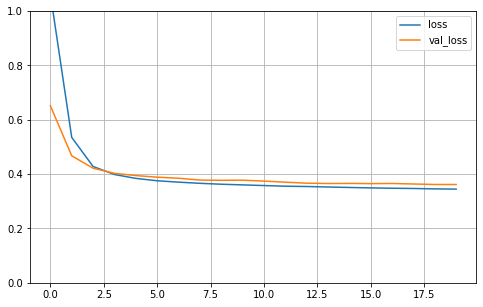

In [9]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [13]:
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

162/162 [==============================] - 0s 660us/step - loss: 0.3537
